<a href="https://colab.research.google.com/github/ariso-sac/Sep-2022-NoteBooks/blob/colab-week-2/ShaswatJeeMain1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

# Opening the html file
HTMLFile = open("index.html", "r")
  
# Reading the file
index = HTMLFile.read()
  
# Creating a BeautifulSoup object and specifying the parser
soup = BeautifulSoup(index, 'html.parser')

tables = soup.find_all("table", {"class": "questionPnlTbl"})

qids=[]
qans=[]
q_Answer_Id=[]
qstatus=[]

def ans_id(data):
  ch=data[-1]
  if ch=='1':
    return data[5]
  if ch=='2':
    return data[7]
  if ch=='3':
    return data[9]
  if ch=='4':
    return data[11]

for table in tables:
  data=[]
  flag=False
  tops = table.find("table", {"class": "menu-tbl"})
  cols = tops.find_all('td')
  cols = [ele.text.strip() for ele in cols]
  data.append([ele for ele in cols if ele])
  data=data[0]
  if data[1]=='SA':
    flag=True
  else:
      qids.append(data[3])
      qans.append(data[-1])
      qstatus.append(data[13])
      q_Answer_Id.append(ans_id(data))
      # print(data)
  if flag:
    # print(data)
    store=[]
    tab = table.find("table", {"class": "questionRowTbl"})
    cols = tab.find_all('td',{'class':"bold"})
    val=cols[-1]
    val=val.text.strip()
    qids.append(data[3])
    qans.append(val)
    qstatus.append(data[5])
    q_Answer_Id.append('NA')

df=pd.DataFrame()

df['Question_IDs']=qids
df['Question_ANs']=qans
df['Question_ANSWER_Id']=q_Answer_Id
df['Question_Status']=qstatus

df.to_csv('marks.csv',index=False)


In [2]:
from bs4 import BeautifulSoup
import pandas as pd

# Opening the html file
HTMLFile = open("claim.html", "r")
  
# Reading the file
index = HTMLFile.read()
  
# Creating a BeautifulSoup object and specifying the parser
soup = BeautifulSoup(index, 'html.parser')

tops = soup.find("table", {"class": "table table-bordered table-condensed"})

rows=tops.find_all("tr")

len(rows)

q_section=[]
q_type=[]
q_ids=[]
q_correct=[]

for row in rows:
    data=[]
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values
    if len(data[0])>1 and data[0][0][0]=='B':
      # print(data[0][0])
      q_section.append(data[0][0])
      q_type.append(data[0][1])
      q_ids.append(data[0][2])
      q_correct.append(data[0][3])

df=pd.DataFrame()

df['Question_IDs']=q_ids
df['Question_Section']=q_section
df['Question_type']=q_type
df['Question_Correct_Answer']=q_correct

df.to_csv('correct.csv',index=False)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
resp=pd.read_csv('marks.csv')
correct=pd.read_csv('correct.csv')

In [5]:
resp = resp.astype(str)
correct = correct.astype(str)

In [6]:
resp.head()

,Question_IDs,Question_ANs,Question_ANSWER_Id,Question_Status
0,3666941171,4,3666943514.0,Answered
1,3666941189,--,nan,Not Answered
2,3666941185,4,3666943567.0,Answered
3,3666941184,2,3666943564.0,Answered
4,3666941176,--,nan,Not Answered


In [7]:
correct.head()

,Question_IDs,Question_Section,Question_type,Question_Correct_Answer
0,3666941171,B TECH - Physics Section A,Objective,3666943514
1,3666941172,B TECH - Physics Section A,Objective,3666943518
2,3666941173,B TECH - Physics Section A,Objective,3666943521
3,3666941174,B TECH - Physics Section A,Objective,3666943526
4,3666941175,B TECH - Physics Section A,Objective,3666943528


In [8]:
df = pd.merge(correct, resp, on="Question_IDs")

In [9]:
df.head()

,Question_IDs,Question_Section,Question_type,Question_Correct_Answer,Question_ANs,Question_ANSWER_Id,Question_Status
0,3666941171,B TECH - Physics Section A,Objective,3666943514,4,3666943514.0,Answered
1,3666941172,B TECH - Physics Section A,Objective,3666943518,3,3666943518.0,Answered
2,3666941173,B TECH - Physics Section A,Objective,3666943521,1,3666943521.0,Answered
3,3666941174,B TECH - Physics Section A,Objective,3666943526,--,nan,Not Attempted and Marked For Review
4,3666941175,B TECH - Physics Section A,Objective,3666943528,4,3666943528.0,Answered


In [10]:
df['Question_Status'].value_counts()

Answered                               41
Not Answered                           32
Not Attempted and Marked For Review    15
Marked For Review                       2
Name: Question_Status, dtype: int64

In [11]:
# c=0
# d=0
sco=[]
for index, row in df.iterrows():
#   # print(row['Question_Status'])
#   if row['Question_Status']=='Answered':
#     c+=1
#   else:
#     d+=1
# print(c,d)
  if row['Question_type']=='Objective':
    if row['Question_Status']=='Answered' or row['Question_Status']=='Marked For Review':
      if float(row['Question_Correct_Answer'])==float(row['Question_ANSWER_Id']):
        sco.append('Correct')
      else:
        sco.append('Wrong')
    else:
      sco.append('Not Attempt')
  else:
      if row['Question_Status']=='Answered' or row['Question_Status']=='Marked For Review':
        if float(row['Question_Correct_Answer'])==float(row['Question_ANs']):
          sco.append('Correct')
        else:
          sco.append('Wrong')
      else:
        sco.append('Not Attempt')

In [12]:
df['Evaluate']=sco

In [13]:
df.head()

,Question_IDs,Question_Section,Question_type,Question_Correct_Answer,Question_ANs,Question_ANSWER_Id,Question_Status,Evaluate
0,3666941171,B TECH - Physics Section A,Objective,3666943514,4,3666943514.0,Answered,Correct
1,3666941172,B TECH - Physics Section A,Objective,3666943518,3,3666943518.0,Answered,Correct
2,3666941173,B TECH - Physics Section A,Objective,3666943521,1,3666943521.0,Answered,Correct
3,3666941174,B TECH - Physics Section A,Objective,3666943526,--,nan,Not Attempted and Marked For Review,Not Attempt
4,3666941175,B TECH - Physics Section A,Objective,3666943528,4,3666943528.0,Answered,Correct


In [14]:
df['Evaluate'].value_counts()

Not Attempt    47
Correct        30
Wrong          13
Name: Evaluate, dtype: int64

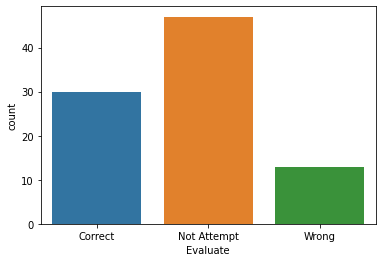

In [15]:
sns.countplot(x=df['Evaluate'])

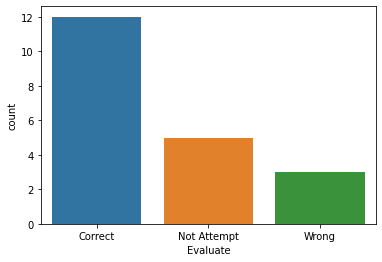

In [16]:
temp=df[df['Question_Section']=='B TECH - Physics Section A']
sns.countplot(x=temp['Evaluate'])

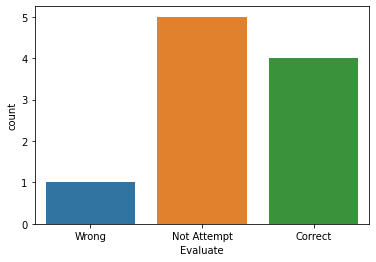

In [17]:
temp=df[df['Question_Section']=='B TECH - Physics Section B']
sns.countplot(x=temp['Evaluate'])

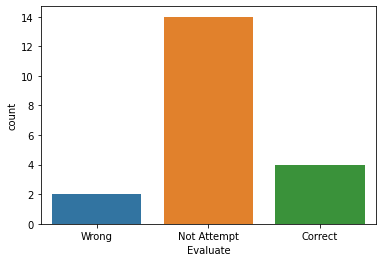

In [18]:
temp=df[df['Question_Section']=='B TECH - Mathematics Section A']
sns.countplot(x=temp['Evaluate'])

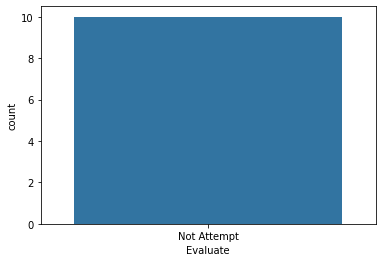

In [19]:
temp=df[df['Question_Section']=='B TECH - Mathematics Section B']
sns.countplot(x=temp['Evaluate'])

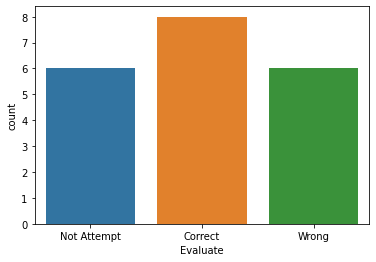

In [20]:
temp=df[df['Question_Section']=='B TECH - Chemistry Section A']
sns.countplot(x=temp['Evaluate'])

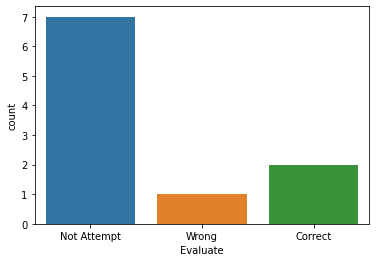

In [21]:
temp=df[df['Question_Section']=='B TECH - Chemistry Section B']
sns.countplot(x=temp['Evaluate'])